Try:
-  `.info()` 
-  `.describe()` 
-  `pd.plotting.scatter_matrix()` 


# Clean data

## Upload data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [4]:
data = pd.read_csv('kc_house_data.csv')

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Drop columns

**Columns to drop:**  
 - date - don't care when house was sold. All in the same 9 months  
 - id - house id not important  
 - view - My goal is to look into qualities of the houses, not the sales process  
 - condition - concept overlaps with 'grade'. Don't want to use both.  
 - lat - I'll use zip coded, but not looking into that specific geography 
 - long - same as above  
 
 I'll probably also drop some square footage stuff after I look into it some based on collinearity  

In [7]:
to_drop = ['id', 'date', 'view', 'condition', 'lat', 'long']

In [8]:
data.drop(to_drop, axis=1, inplace=True)

In [9]:
data.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.0,1180,5650,1.0,NaN,7,1180,0.0,1955,0.0,98178,1340,5650


## Check for collinearity of area-based columns

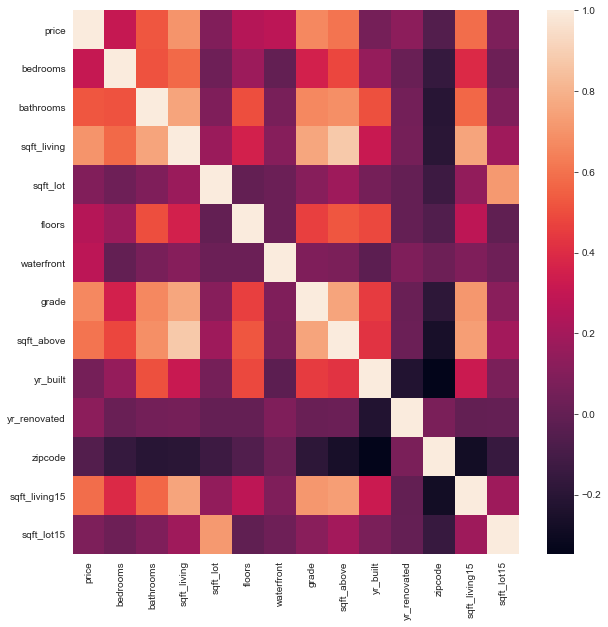

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr());

In [11]:
data.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [12]:
area_categs = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

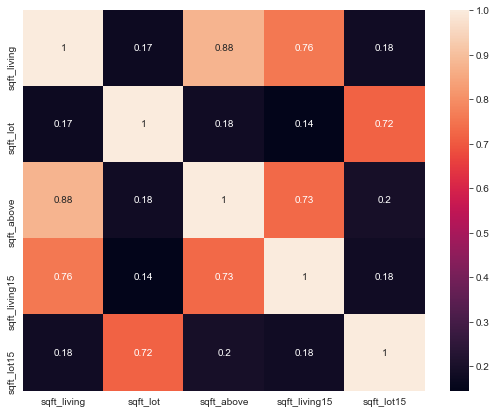

In [13]:
plt.figure(figsize=(9,7))
sns.heatmap(data[area_categs].corr(), annot=True);

**High correlations:**
- sqft_living/sqft_above  
- sqft_living/sqft_living15  

I'll take those out of the heatmap and recheck:

In [14]:
area_categs = ['sqft_living', 'sqft_lot', 'sqft_basement', 'sqft_lot15']

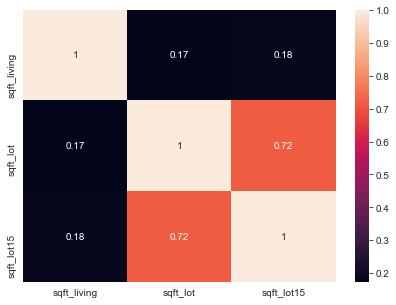

In [15]:
plt.figure(figsize=(7,5))
sns.heatmap(data[area_categs].corr(), annot=True);

**High correlations:**
- sqft_lot/sqft_lot15  

So I'll remove from the dataframe:
- sqft_above  
- sqft_living15  
- sqft_lot15  

## Drop collinear columns

In [16]:
to_drop = ['sqft_above', 'sqft_living15', 'sqft_lot15']
data.drop(to_drop, axis=1, inplace=True)

In [17]:
data.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode
0,221900.0,3,1.0,1180,5650,1.0,NaN,7,0.0,1955,0.0,98178


## Convert datatypes and deal with NaN's

In [18]:
data.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
grade              int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
dtype: object

In [19]:
data.sqft_basement

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: object

`data.sqft_basement = data.sqft_basement.astype(float)` doesn't work. Must be some weird characters in it.

In [20]:
data.sqft_basement.tolist()[0:20]

['0.0',
 '400.0',
 '0.0',
 '910.0',
 '0.0',
 '1530.0',
 '?',
 '0.0',
 '730.0',
 '0.0',
 '1700.0',
 '300.0',
 '0.0',
 '0.0',
 '0.0',
 '970.0',
 '0.0',
 '0.0',
 '?',
 '0.0']

I see there are a lot of '?' in it.

In [21]:
data.sqft_basement.tolist().count('?')

454

In [22]:
data.sqft_basement.tolist().count('?')/len(data)

0.021021438162707785

Just about 2% are question marks. I'll just assume these homes have no basement.

In [23]:
data.sqft_basement = data.sqft_basement.replace(to_replace='?', value='0.0')

Now, I'll convert them to floats

In [24]:
data.sqft_basement = data.sqft_basement.astype(float)

Converting bathroom to integer...

I was going to do: `data.bathrooms = data.bathrooms.astype(int)` but I see that there are half bathrooms, etc. so I'll leave that alone.

In [25]:
data.bathrooms.tolist()[0:10]

[1.0, 2.25, 1.0, 3.0, 2.0, 4.5, 2.25, 1.5, 1.0, 2.5]

Converting yr_renovated to integer

`data.yr_renovated = data.yr_renovated.astype(int)` gives me an error. Might be some weird data in there.

In [26]:
data.yr_renovated.tolist()[0:10]

[0.0, 1991.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

I see there are some `nan`. Will change to 0.

In [27]:
data.yr_renovated.isna().sum()/len(data)

0.17789507802009538

18% has no data as to whether was renovated. I'm going to convert those to 0, in particular because I plan to only look at "recently renovated" later on, and if something was recently renovated, it should be have a date. 

In [28]:
data.yr_renovated = data.yr_renovated.fillna(0)

In [29]:
data.yr_renovated = data.yr_renovated.astype(int)

In [30]:
data.yr_renovated

0           0
1        1991
2           0
3           0
4           0
         ... 
21592       0
21593       0
21594       0
21595       0
21596       0
Name: yr_renovated, Length: 21597, dtype: int32

Check out waterfront

In [31]:
data.waterfront.isna().sum()/len(data)

0.11001527989998611

11% of waterfront is nan. But I'll convert that to 0, because if something had a waterfront, it would likely be known.

In [32]:
data.waterfront = data.waterfront.fillna(0)

Any more Nan's? Nope...

In [33]:
data.isnull().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
grade            False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
dtype: bool

## Check for outliers

One of the bedrooms is off

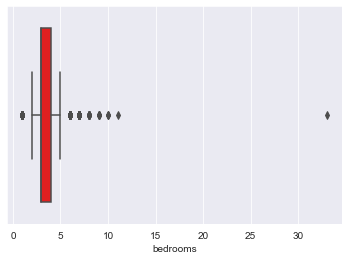

In [34]:
sns.boxplot(x=data['bedrooms'], color='r')

In [35]:
data[data.bedrooms > 20]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode
15856,640000.0,33,1.75,1620,6000,1.0,0.0,7,580.0,1947,0,98103


I'll remove this one.

In [36]:
data = data.drop(data.index[15856])

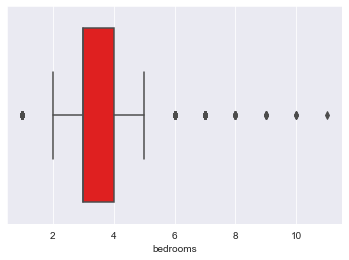

In [37]:
sns.boxplot(x=data['bedrooms'], color='r')

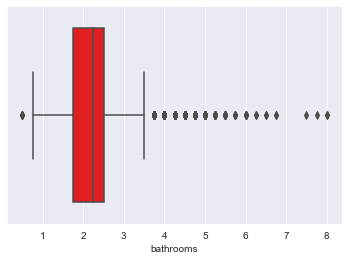

In [38]:
sns.boxplot(x=data['bathrooms'], color='r')

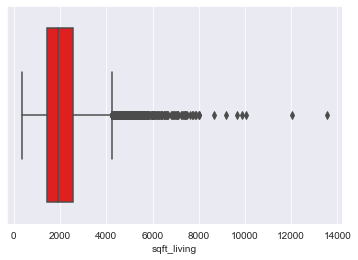

In [39]:
sns.boxplot(x=data['sqft_living'], color='r')

In [40]:
data[data.sqft_living > 11000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode
7245,7700000.0,6,8.0,12050,27600,2.5,0.0,13,3480.0,1910,1987,98102
12764,2280000.0,7,8.0,13540,307752,3.0,0.0,12,4130.0,1999,0,98053


I'll drop those two mansions.

In [44]:
data.drop(data[data.sqft_living > 11000].index, inplace = True) 

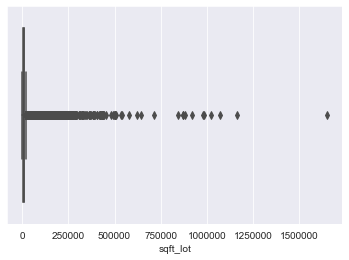

In [45]:
sns.boxplot(x=data['sqft_lot'], color='r')

In [46]:
data[data.sqft_lot > 1250000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode
1717,700000.0,4,1.0,1300,1651359,1.0,0.0,6,0.0,1920,0,98022


I'll get rid of this outlier

In [47]:
data.drop(data[data.sqft_lot > 1250000].index, inplace = True) 

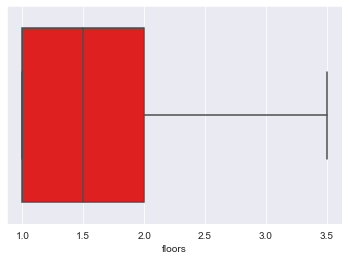

In [50]:
sns.boxplot(x=data['floors'], color='r')

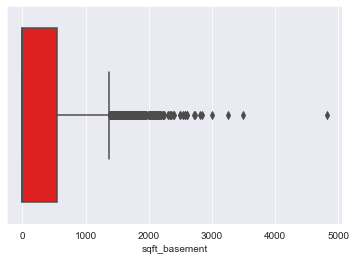

In [51]:
sns.boxplot(x=data['sqft_basement'], color='r')

That's a weird house with a HUGE basement. I'll drop it.

In [52]:
data.drop(data[data.sqft_basement > 4000].index, inplace = True) 

In [55]:
data.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
grade              int64
sqft_basement    float64
yr_built           int64
yr_renovated       int32
zipcode            int64
dtype: object

All the other ones look good

Check for correlation again.

In [56]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode
price,1.000000,0.315598,0.522522,0.699231,0.091866,0.258280,0.262205,0.670170,0.312823,0.056155,0.111895,-0.053989
bedrooms,0.315598,1.000000,0.527208,0.593848,0.032226,0.183219,-0.003049,0.365273,0.301926,0.160997,0.017547,-0.158580
bathrooms,0.522522,0.527208,1.000000,0.753824,0.092252,0.503084,0.060723,0.664949,0.272381,0.509269,0.044089,-0.205395
sqft_living,0.699231,0.593848,0.753824,1.000000,0.178959,0.354631,0.101247,0.763837,0.421667,0.321026,0.046909,-0.201130
sqft_lot,0.091866,0.032226,0.092252,0.178959,1.000000,-0.004253,0.022597,0.120772,0.013887,0.058052,0.005540,-0.132571
floors,0.258280,0.183219,0.503084,0.354631,-0.004253,1.000000,0.021401,0.458678,-0.244604,0.489417,0.003579,-0.059596
waterfront,0.262205,-0.003049,0.060723,0.101247,0.022597,0.021401,1.000000,0.081136,0.078017,-0.024820,0.071301,0.029421
grade,0.670170,0.365273,0.664949,0.763837,0.120772,0.458678,0.081136,1.000000,0.162099,0.448553,0.013647,-0.185947
sqft_basement,0.312823,0.301926,0.272381,0.421667,0.013887,-0.244604,0.078017,0.162099,1.000000,-0.130739,0.061182,0.074011
yr_built,0.056155,0.160997,0.509269,0.321026,0.058052,0.489417,-0.024820,0.448553,-0.130739,1.000000,-0.202469,-0.347290


In [57]:
abs(data.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode
price,True,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,True,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False
grade,False,False,False,True,False,False,False,True,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,True,False,False,False
yr_built,False,False,False,False,False,False,False,False,False,True,False,False


Only things like sqft_living, grade, and bathrooms. But I don't want to delete those.

# Categorical Data

## Find which columns are categorical

In [58]:
data.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
grade              int64
sqft_basement    float64
yr_built           int64
yr_renovated       int32
zipcode            int64
dtype: object

In [63]:
categorical = ['bedrooms', 'floors', 'waterfront', 'grade', 'bathrooms']

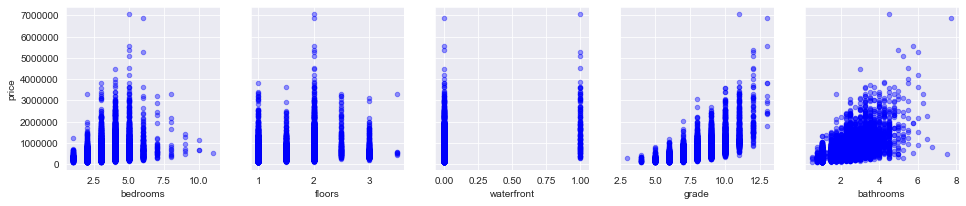

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))

for xcol, ax in zip(categorical, axes):
    data.plot(kind='scatter', x=xcol, y='price', sharey=True, ax=ax, alpha=0.4, color='b')

Actually, I won't consider bathrooms to be categorical

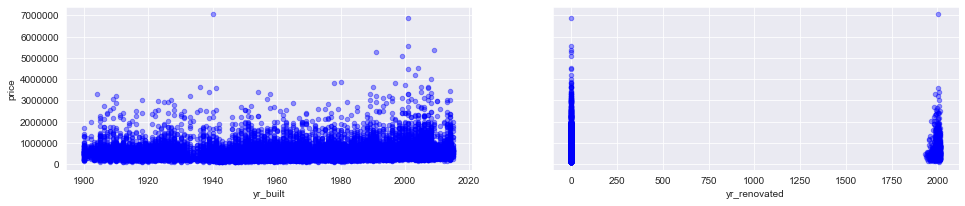

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,3))

for xcol, ax in zip(['yr_built', 'yr_renovated'], axes):
    data.plot(kind='scatter', x=xcol, y='price', sharey=True, ax=ax, alpha=0.4, color='b')

yr_renovated looks weird. Will make it bigger.

In [70]:
new_renov = data[data.yr_renovated > 0] 

In [75]:
new_renov.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode
1,538000.0,3,2.25,2570,7242,2.0,0.0,7,400.0,1951,1991,98125


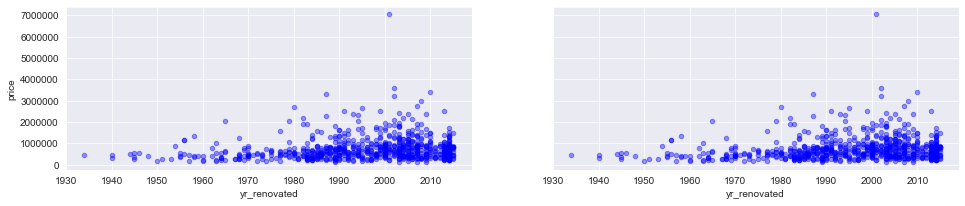

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,3))

for xcol, ax in zip(['yr_renovated', 'yr_renovated'], axes):
    new_renov.plot(kind='scatter', x=xcol, y='price', sharey=True, ax=ax, alpha=0.4, color='b')

I'm going to create a new column 'recent_renov' and set 1990 as a cut off year. 25 years ago.

In [78]:
data['recent_renov'] = [True if x >= 1990 else False for x in data['yr_renovated']]

In [79]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,recent_renov
0,221900.0,3,1.00,1180,5650,1.0,0.0,7,0.0,1955,0,98178,False
1,538000.0,3,2.25,2570,7242,2.0,0.0,7,400.0,1951,1991,98125,True
2,180000.0,2,1.00,770,10000,1.0,0.0,6,0.0,1933,0,98028,False
3,604000.0,4,3.00,1960,5000,1.0,0.0,7,910.0,1965,0,98136,False
4,510000.0,3,2.00,1680,8080,1.0,0.0,8,0.0,1987,0,98074,False
